homeprices_Multiple_LR

In [39]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv('homeprices_Multiple_LR.csv')

# Handle missing values (Fill NA with median value)
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())

# Define features (X) and target (y)
X = df.drop(columns=['price'])  # Independent variables
y = df['price']  # Dependent variable

# Train Linear Regression Model
reg = LinearRegression()
reg.fit(X, y)

# Make predictions (Pass DataFrame instead of list)
pred_df = pd.DataFrame({'area': [3000], 'bedrooms': [3], 'age': [40]})
pred_price = reg.predict(pred_df)[0]

# Print results
print(f"Predicted Price for 3000 sq ft, 3 bedrooms, 40 years old: ${pred_price:.2f}")

# Model parameters
print(f"Coefficients: {reg.coef_}")
print(f"Intercept: {reg.intercept_}")

# Manual Calculation for Verification
manual_price = (
    reg.coef_[0] * 3000 +
    reg.coef_[1] * 3 +
    reg.coef_[2] * 40 +
    reg.intercept_
)
print(f"Manual Calculation for 3000 sq ft: ${manual_price:.2f}")


Predicted Price for 3000 sq ft, 3 bedrooms, 40 years old: $498408.25
Coefficients: [  112.06244194 23388.88007794 -3231.71790863]
Intercept: 221323.00186540396
Manual Calculation for 3000 sq ft: $498408.25


housing_area_price.csv

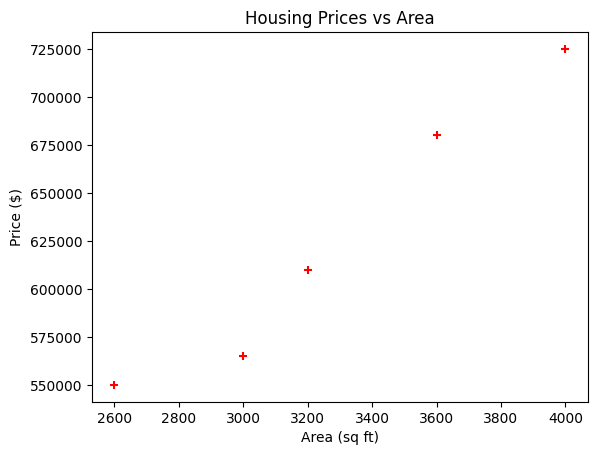

Predicted Price for 3300 sq ft: $628715.75
Predicted Price for 5000 sq ft: $859554.79
Coefficient (m): 135.79
Intercept (b): 180616.44
Manual Calculation for 3300 sq ft: $628715.75


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv('housing_area_price.csv')

# Scatter plot of area vs. price
plt.scatter(df['area'], df['price'], color='red', marker='+')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price ($)')
plt.title('Housing Prices vs Area')
plt.show()

# Define features (X) and target (y)
X = df[['area']]  # Independent variable (must be a DataFrame)
y = df['price']   # Dependent variable

# Train Linear Regression Model
reg = LinearRegression()
reg.fit(X, y)

# Make predictions (Pass DataFrame instead of list)
pred_df_3300 = pd.DataFrame({'area': [3300]})
pred_df_5000 = pd.DataFrame({'area': [5000]})

pred_price_3300 = reg.predict(pred_df_3300)[0]
pred_price_5000 = reg.predict(pred_df_5000)[0]

# Print results
print(f"Predicted Price for 3300 sq ft: ${pred_price_3300:.2f}")
print(f"Predicted Price for 5000 sq ft: ${pred_price_5000:.2f}")

# Model parameters
print(f"Coefficient (m): {reg.coef_[0]:.2f}")
print(f"Intercept (b): {reg.intercept_:.2f}")

# Manual Calculation for Verification
manual_price_3300 = reg.coef_[0] * 3300 + reg.intercept_
print(f"Manual Calculation for 3300 sq ft: ${manual_price_3300:.2f}")


Canada_per_capita_income.csv and Salary.csv

In [37]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
from sklearn import linear_model
from scipy.stats.mstats import winsorize

# Load datasets
canada_income_df = pd.read_csv("canada_per_capita_income.csv")
print(canada_income_df.head())
print("\n")
salary_df = pd.read_csv("salary.csv")
print(salary_df.head())
print("\n")

"""### Data Preprocessing"""

# Handle missing values in YearsExperience
salary_df.loc[:, 'YearsExperience'] = salary_df['YearsExperience'].fillna(salary_df['YearsExperience'].median())

# Apply Winsorization to handle outliers
salary_df["Salary"] = winsorize(salary_df["Salary"], limits=[0.05, 0.05])
salary_df["YearsExperience"] = winsorize(salary_df["YearsExperience"], limits=[0.05, 0.05])

"""### Canada Per Capita Income Prediction"""

X_canada = canada_income_df[['year']]
y_canada = canada_income_df['per capita income (US$)']

# Create linear regression object
reg_canada = linear_model.LinearRegression()
reg_canada.fit(X_canada, y_canada)

"""(1) Predict per capita income for 2020"""

income_2020 = reg_canada.predict(pd.DataFrame([[2020]], columns=["year"]))
income_2020

"""(2) Model Coefficients"""

print("Coefficient:",reg_canada.coef_)
print("Intercept:",reg_canada.intercept_)
print("\n")

"""### Employee Salary Prediction"""

X_salary = salary_df[['YearsExperience']]
y_salary = salary_df['Salary']

# Create linear regression object
reg_salary = linear_model.LinearRegression()
reg_salary.fit(X_salary, y_salary)

"""(1) Predict salary for an employee with 12 years of experience"""

salary_12_years = reg_salary.predict(pd.DataFrame([[12]], columns=["YearsExperience"]))
salary_12_years

"""(2) Model Coefficients"""

print("Coefficient:",reg_salary.coef_)
print("Intercept:",reg_salary.intercept_)
print("\n")

"""### Final Results"""
print(f"Predicted Per Capita Income for 2020: ${income_2020[0]:.2f}")
print(f"Predicted Salary for 12 Years Experience: ${salary_12_years[0]:.2f}")


   year  per capita income (US$)
0  1970              3399.299037
1  1971              3768.297935
2  1972              4251.175484
3  1973              4804.463248
4  1974              5576.514583


   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891


Coefficient: [828.46507522]
Intercept: -1632210.7578554575


Coefficient: [9318.70908245]
Intercept: 28079.143922303017


Predicted Per Capita Income for 2020: $41288.69
Predicted Salary for 12 Years Experience: $139903.65


Hiring.csv

In [24]:
!pip install word2number

  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5568 sha256=718c51c59b49147f608eb1cf9a1949dc76650be2fedd2f78a49530318e495906
  Stored in directory: /root/.cache/pip/wheels/cd/ef/ae/073b491b14d25e2efafcffca9e16b2ee6d114ec5c643ba4f06
Successfully built word2number


In [26]:
from word2number import w2n
import pandas as pd
from sklearn import linear_model

# Load the dataset
df = pd.read_csv('hiring.csv')

# Preprocess the data
df.experience = df.experience.fillna("zero")
df.experience = df.experience.apply(lambda x: w2n.word_to_num(x))
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].median())

# Create and train the linear regression model
reg = linear_model.LinearRegression()
X = df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']]
y = df['salary($)']
reg.fit(X, y)

# Predict salaries for the given candidates
candidates = pd.DataFrame([[2, 9, 6], [12, 10, 10]], columns=X.columns)
predicted_salaries = reg.predict(candidates)

print(f"Predicted Salary for (2 yrs, 9 test, 6 interview): ${predicted_salaries[0]:.2f}")
print(f"Predicted Salary for (12 yrs, 10 test, 10 interview): ${predicted_salaries[1]:.2f}")


Predicted Salary for (2 yrs, 9 test, 6 interview): $53205.97
Predicted Salary for (12 yrs, 10 test, 10 interview): $92002.18


1000_Companies.csv

In [29]:
import pandas as pd
from sklearn import linear_model

# Load the dataset
df = pd.read_csv('1000_Companies.csv')

# Prepare the data
X = df[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
y = df['Profit']

# Convert 'State' column to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['State'], drop_first=True)

# Create and train the linear regression model
reg = linear_model.LinearRegression()
reg.fit(X, y)

# Prepare the input for prediction
rd_spend = 91694.48
administration = 515841.3
marketing_spend = 11931.24
state = 'Florida'

# Create a DataFrame for prediction input
input_data = pd.DataFrame({'R&D Spend': [rd_spend],
                           'Administration': [administration],
                           'Marketing Spend': [marketing_spend],
                           'State': [state]})

# Apply one-hot encoding to the input data
input_data = pd.get_dummies(input_data, columns=['State'], drop_first=True)

# Ensure the input columns match the training data columns
missing_cols = set(X.columns) - set(input_data.columns)
for col in missing_cols:
    input_data[col] = 0
input_data = input_data[X.columns]

# Make the prediction
predicted_profit = reg.predict(input_data)

print("Predicted profit:", predicted_profit)

Predicted profit: [511017.34614637]
